Список директориев

In [1]:
import sys
sys.path.append("../")

In [2]:
dir1 = 'matiz black'
dir2 = 'matiz blue'
dir3 = 'matiz red'
dir4 = 'rio black'
dir5 = 'rio blue'
dir6 = 'rio red'
dir7 = 'tiggo black'
dir8 = 'tiggo blue'
dir9 = 'tiggo red'

directory_list = []
for i in range(1, 10):  
    directory_list.append(globals()[f'dir{i}'])

directory_list

['matiz black',
 'matiz blue',
 'matiz red',
 'rio black',
 'rio blue',
 'rio red',
 'tiggo black',
 'tiggo blue',
 'tiggo red']

In [3]:
len(directory_list)

9

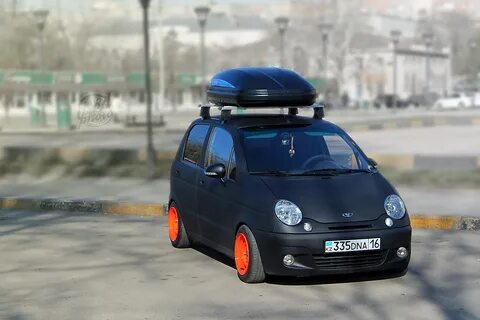

In [4]:
from IPython.display import Image
Image(r"matiz black\0f1f3625316794d1d2f60770e43eeb21f3f75786.png")

In [7]:
# Import necessary libraries
import torch
from torch import nn

# Import torchvision 
import torchvision
from torchvision import datasets
from torchvision.transforms import ToTensor
from PIL import Image
import torchvision.transforms as transforms
import numpy as np
import matplotlib.pyplot as plt
# Importing dependencies

import warnings
warnings.filterwarnings('ignore')
import os
import numpy as np
import pandas as pd
from tqdm.notebook import tqdm
import cv2


from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report

from typing import Tuple, Dict, List

In [9]:
image = Image.open(r'C:\Users\Никита\Desktop\Cars classification\matiz black\0f1f3625316794d1d2f60770e43eeb21f3f75786.png')
transform = transforms.Compose([transforms.PILToTensor()])
img_tensor = transform(image)
img_tensor = img_tensor.to(dtype = torch.float32)
img_tensor.shape

torch.Size([3, 320, 480])

In [10]:
data_transform = transforms.Compose([
    transforms.Resize(size=(256, 256)),
    transforms.ToTensor() 
])

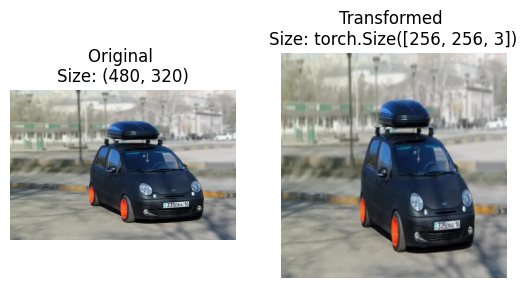

In [11]:
with Image.open(r'C:\Users\Никита\Desktop\Cars classification\matiz black\0f1f3625316794d1d2f60770e43eeb21f3f75786.png') as f:
    fig, ax = plt.subplots(1, 2)
    ax[0].imshow(f) 
    ax[0].set_title(f"Original \nSize: {f.size}")
    ax[0].axis("off")

    transformed_image = data_transform(f).permute(1, 2, 0) 
    ax[1].imshow(transformed_image) 
    ax[1].set_title(f"Transformed \nSize: {transformed_image.shape}")
    ax[1].axis("off")




In [12]:
dictionary = {
    'matiz black': 0,
    'matiz blue' : 1,
    'matiz red' : 2,
    'rio black' : 3,
    'rio blue' : 4,
    'rio red' : 5,
    'tiggo black' : 6,
    'tiggo blue' : 7,
    'tiggo red' : 8
}

In [13]:
# Import necessary libraries
import torch
from PIL import Image
import torchvision.transforms as transforms

# Read a PIL image
import os
image_array =[]
i = 0
while i < len(directory_list):
    for filename in os.scandir(directory_list[i]):
            if filename.is_file:
                image = Image.open(filename.path)

                img_tensor = data_transform(image)
                if img_tensor.shape == torch.Size([3, 256, 256]):
                    t = (img_tensor, i)
                    image_array.append(t)
    i = i + 1
                
print(len(image_array))

2732


In [14]:
df = pd.DataFrame(image_array, columns=['Tensor', 'Label'])

df.head()

,Tensor,Label
0,"[[[tensor(0.2745), tensor(0.2745), tensor(0.27...",0
1,"[[[tensor(0.2745), tensor(0.2745), tensor(0.27...",0
2,"[[[tensor(0.8824), tensor(0.9686), tensor(0.79...",0
3,"[[[tensor(0.1804), tensor(0.1922), tensor(0.21...",0
4,"[[[tensor(0.0980), tensor(0.2118), tensor(0.09...",0


In [15]:
SEED = 42
X_train, X_test, y_train, y_test = train_test_split(np.array(df['Tensor']),np.array( df['Label']), test_size = 0.2, random_state = SEED)
print("train images: ", X_train.shape[0])
print("test images: ", X_test.shape[0])

train images:  2185
test images:  547


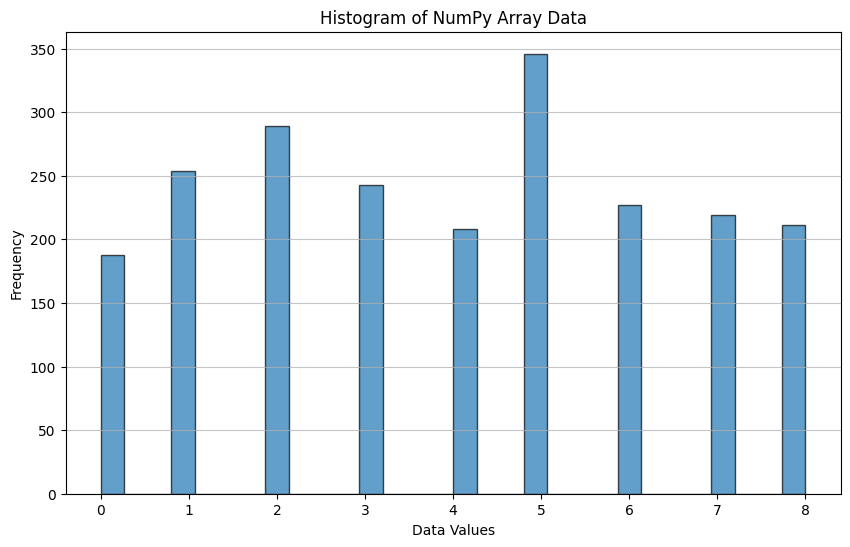

In [16]:
plt.figure(figsize=(10, 6))  #
plt.hist(y_train, bins=30, edgecolor='black', alpha=0.7)  
plt.title('Histogram of NumPy Array Data')  
plt.xlabel('Data Values')  
plt.ylabel('Frequency')  
plt.grid(axis='y', alpha=0.75) 
plt.show()  

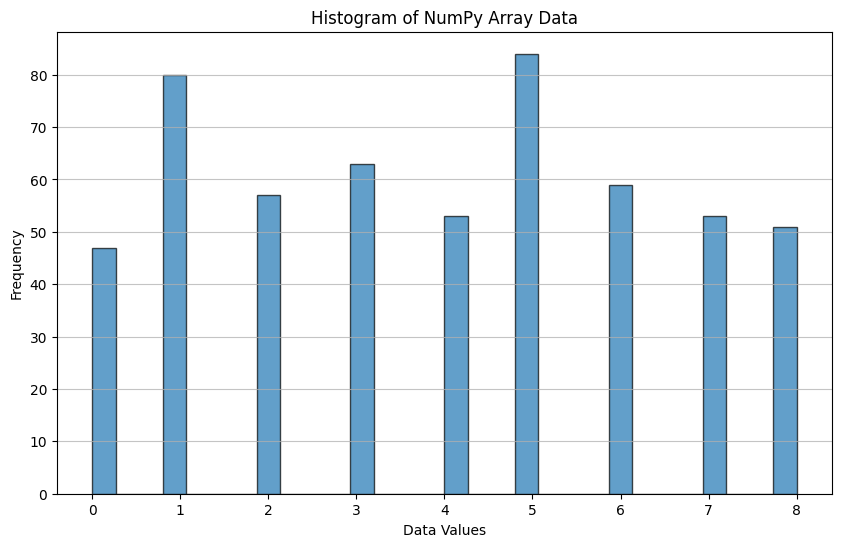

In [17]:
plt.figure(figsize=(10, 6))  
plt.hist(y_test, bins=30, edgecolor='black', alpha=0.7)  
plt.title('Histogram of NumPy Array Data') 
plt.xlabel('Data Values')  
plt.ylabel('Frequency') 
plt.grid(axis='y', alpha=0.75)  
plt.show()  

In [18]:
i = 0
train_data = []
while i < len(X_train):
    t = (X_train[i], y_train[i])
    train_data.append(t)
    i = i + 1
print(train_data[30])

(tensor([[[0.9098, 0.9059, 0.9020,  ..., 0.3137, 0.2431, 0.0941],
         [0.9020, 0.8980, 0.9098,  ..., 0.2000, 0.2549, 0.0902],
         [0.9059, 0.9098, 0.9059,  ..., 0.1725, 0.1412, 0.0471],
         ...,
         [0.4118, 0.4118, 0.4000,  ..., 0.4157, 0.4235, 0.4275],
         [0.4235, 0.4039, 0.4157,  ..., 0.4118, 0.4157, 0.4157],
         [0.4078, 0.4118, 0.4275,  ..., 0.4157, 0.4078, 0.4078]],

        [[0.9804, 0.9765, 0.9725,  ..., 0.3765, 0.3059, 0.1529],
         [0.9725, 0.9686, 0.9765,  ..., 0.2627, 0.3176, 0.1529],
         [0.9765, 0.9804, 0.9725,  ..., 0.2353, 0.2039, 0.1098],
         ...,
         [0.4196, 0.4196, 0.4078,  ..., 0.4157, 0.4235, 0.4275],
         [0.4314, 0.4118, 0.4235,  ..., 0.4118, 0.4157, 0.4157],
         [0.4157, 0.4196, 0.4353,  ..., 0.4157, 0.4078, 0.4078]],

        [[0.9804, 0.9765, 0.9725,  ..., 0.3176, 0.2627, 0.1255],
         [0.9725, 0.9686, 0.9765,  ..., 0.2039, 0.2706, 0.1216],
         [0.9765, 0.9804, 0.9725,  ..., 0.1765, 0.1529, 0

In [19]:
i = 0
test_data = []
while i < len(X_test):
    t = (X_test[i], y_test[i])
    test_data.append(t)
    i = i + 1
print(test_data[30])

(tensor([[[0.0941, 0.0627, 0.0941,  ..., 0.0000, 0.0039, 0.0039],
         [0.1294, 0.1451, 0.1333,  ..., 0.0000, 0.0000, 0.0000],
         [0.0667, 0.2627, 0.1647,  ..., 0.0000, 0.0000, 0.0000],
         ...,
         [0.7686, 0.7647, 0.7451,  ..., 0.0157, 0.0078, 0.0078],
         [0.7490, 0.7529, 0.7529,  ..., 0.0235, 0.0157, 0.0118],
         [0.7373, 0.7412, 0.7529,  ..., 0.0314, 0.0196, 0.0118]],

        [[0.1843, 0.1412, 0.1490,  ..., 0.6706, 0.6784, 0.6784],
         [0.2196, 0.2235, 0.1882,  ..., 0.6706, 0.6745, 0.6745],
         [0.1569, 0.3373, 0.2196,  ..., 0.6706, 0.6745, 0.6745],
         ...,
         [0.7490, 0.7451, 0.7255,  ..., 0.0863, 0.0745, 0.0706],
         [0.7294, 0.7333, 0.7333,  ..., 0.0941, 0.0824, 0.0745],
         [0.7176, 0.7216, 0.7333,  ..., 0.1020, 0.0824, 0.0745]],

        [[0.1137, 0.0667, 0.0784,  ..., 0.9686, 0.9765, 0.9765],
         [0.1451, 0.1490, 0.1176,  ..., 0.9686, 0.9725, 0.9725],
         [0.0784, 0.2588, 0.1529,  ..., 0.9686, 0.9725, 0

In [20]:
from torch.utils.data import DataLoader

# Setup the batch size hyperparameter
BATCH_SIZE = 32

# Turn datasets into iterables (batches)
train_dataloader = DataLoader(train_data, # dataset to turn into iterable
    batch_size=BATCH_SIZE, # how many samples per batch? 
    shuffle=True # shuffle data every epoch?
)

test_dataloader = DataLoader(test_data,
    batch_size=BATCH_SIZE,
    shuffle=False # don't necessarily have to shuffle the testing data
)

# Let's check out what we've created
print(f"Dataloaders: {train_dataloader, test_dataloader}") 
print(f"Length of train dataloader: {len(train_dataloader)} batches of {BATCH_SIZE}")
print(f"Length of test dataloader: {len(test_dataloader)} batches of {BATCH_SIZE}")

Dataloaders: (<torch.utils.data.dataloader.DataLoader object at 0x0000011CEB294260>, <torch.utils.data.dataloader.DataLoader object at 0x0000011CEB295940>)
Length of train dataloader: 69 batches of 32
Length of test dataloader: 18 batches of 32


In [21]:
# Check out what's inside the training dataloader
train_features_batch, train_labels_batch = next(iter(train_dataloader))
train_features_batch.shape, train_labels_batch.shape

(torch.Size([32, 3, 256, 256]), torch.Size([32]))

In [22]:
# Check out what's inside the testing dataloader
test_features_batch, test_labels_batch = next(iter(test_dataloader))
test_features_batch.shape, test_labels_batch.shape

(torch.Size([32, 3, 256, 256]), torch.Size([32]))

In [23]:
num_classes = 9

In [24]:
# Setup device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cpu'

# **CNN: TinyVGG architecture**

In [25]:
class TinyVGG(nn.Module):
    def __init__(self, input_shape: int, hidden_units: int, output_shape: int) -> None:
        super().__init__()
        self.conv_block_1 = nn.Sequential(
            nn.Conv2d(in_channels=input_shape, 
                      out_channels=hidden_units, 
                      kernel_size=3, 
                      stride=1,
                      padding=1), 
            nn.ReLU(),
            nn.Dropout(0.2),
            nn.Conv2d(in_channels=hidden_units, 
                      out_channels=hidden_units,
                      kernel_size=3,
                      stride=1,
                      padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2,
                         stride=2) 
        )
        self.conv_block_2 = nn.Sequential(
            nn.Conv2d(hidden_units, hidden_units, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.Dropout(0.2),
            nn.Conv2d(hidden_units, hidden_units, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2)
        )
        self.classifier = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features=hidden_units*64*64,
                      out_features=output_shape)
        )
    
    def forward(self, x: torch.Tensor): 
        x = self.conv_block_1(x)
        x = self.conv_block_2(x)
        x = self.classifier(x)
        return x
    
    torch.manual_seed(42)
model_0 = TinyVGG(input_shape=3, 
                  hidden_units=10, 
                  output_shape=num_classes).to(device)
model_0

TinyVGG(
  (conv_block_1): Sequential(
    (0): Conv2d(3, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Dropout(p=0.2, inplace=False)
    (3): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): ReLU()
    (5): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Dropout(p=0.2, inplace=False)
    (3): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): ReLU()
    (5): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=40960, out_features=9, bias=True)
  )
)

In [26]:
"""
A series of helper functions used throughout the course.

If a function gets defined once and could be used over and over, it'll go in here.
"""
import torch
import matplotlib.pyplot as plt
import numpy as np

from torch import nn

import os
import zipfile

from pathlib import Path

import requests

# Walk through an image classification directory and find out how many files (images)
# are in each subdirectory.
import os

def walk_through_dir(dir_path):
    """
    Walks through dir_path returning its contents.
    Args:
    dir_path (str): target directory

    Returns:
    A print out of:
      number of subdiretories in dir_path
      number of images (files) in each subdirectory
      name of each subdirectory
    """
    for dirpath, dirnames, filenames in os.walk(dir_path):
        print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

def plot_decision_boundary(model: torch.nn.Module, X: torch.Tensor, y: torch.Tensor):
    """Plots decision boundaries of model predicting on X in comparison to y.

    Source - https://madewithml.com/courses/foundations/neural-networks/ (with modifications)
    """
    # Put everything to CPU (works better with NumPy + Matplotlib)
    model.to("cpu")
    X, y = X.to("cpu"), y.to("cpu")

    # Setup prediction boundaries and grid
    x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
    y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 101), np.linspace(y_min, y_max, 101))

    # Make features
    X_to_pred_on = torch.from_numpy(np.column_stack((xx.ravel(), yy.ravel()))).float()

    # Make predictions
    model.eval()
    with torch.inference_mode():
        y_logits = model(X_to_pred_on)

    # Test for multi-class or binary and adjust logits to prediction labels
    if len(torch.unique(y)) > 2:
        y_pred = torch.softmax(y_logits, dim=1).argmax(dim=1)  # mutli-class
    else:
        y_pred = torch.round(torch.sigmoid(y_logits))  # binary

    # Reshape preds and plot
    y_pred = y_pred.reshape(xx.shape).detach().numpy()
    plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
    plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())


# Plot linear data or training and test and predictions (optional)
def plot_predictions(
    train_data, train_labels, test_data, test_labels, predictions=None
):
    """
  Plots linear training data and test data and compares predictions.
  """
    plt.figure(figsize=(10, 7))

    # Plot training data in blue
    plt.scatter(train_data, train_labels, c="b", s=4, label="Training data")

    # Plot test data in green
    plt.scatter(test_data, test_labels, c="g", s=4, label="Testing data")

    if predictions is not None:
        # Plot the predictions in red (predictions were made on the test data)
        plt.scatter(test_data, predictions, c="r", s=4, label="Predictions")

    # Show the legend
    plt.legend(prop={"size": 14})


# Calculate accuracy (a classification metric)
def accuracy_fn(y_true, y_pred):
    """Calculates accuracy between truth labels and predictions.

    Args:
        y_true (torch.Tensor): Truth labels for predictions.
        y_pred (torch.Tensor): Predictions to be compared to predictions.

    Returns:
        [torch.float]: Accuracy value between y_true and y_pred, e.g. 78.45
    """
    correct = torch.eq(y_true, y_pred).sum().item()
    acc = (correct / len(y_pred)) * 100
    return acc


def print_train_time(start, end, device=None):
    """Prints difference between start and end time.

    Args:
        start (float): Start time of computation (preferred in timeit format). 
        end (float): End time of computation.
        device ([type], optional): Device that compute is running on. Defaults to None.

    Returns:
        float: time between start and end in seconds (higher is longer).
    """
    total_time = end - start
    print(f"\nTrain time on {device}: {total_time:.3f} seconds")
    return total_time


# Plot loss curves of a model
def plot_loss_curves(results):
    """Plots training curves of a results dictionary.

    Args:
        results (dict): dictionary containing list of values, e.g.
            {"train_loss": [...],
             "train_acc": [...],
             "test_loss": [...],
             "test_acc": [...]}
    """
    loss = results["train_loss"]
    test_loss = results["test_loss"]

    accuracy = results["train_acc"]
    test_accuracy = results["test_acc"]

    epochs = range(len(results["train_loss"]))

    plt.figure(figsize=(15, 7))

    # Plot loss
    plt.subplot(1, 2, 1)
    plt.plot(epochs, loss, label="train_loss")
    plt.plot(epochs, test_loss, label="test_loss")
    plt.title("Loss")
    plt.xlabel("Epochs")
    plt.legend()

    # Plot accuracy
    plt.subplot(1, 2, 2)
    plt.plot(epochs, accuracy, label="train_accuracy")
    plt.plot(epochs, test_accuracy, label="test_accuracy")
    plt.title("Accuracy")
    plt.xlabel("Epochs")
    plt.legend()


# Pred and plot image function from notebook 04
# See creation: https://www.learnpytorch.io/04_pytorch_custom_datasets/#113-putting-custom-image-prediction-together-building-a-function
from typing import List
import torchvision


def pred_and_plot_image(
    model: torch.nn.Module,
    image_path: str,
    class_names: List[str] = None,
    transform=None,
    device: torch.device = "cuda" if torch.cuda.is_available() else "cpu",
):
    """Makes a prediction on a target image with a trained model and plots the image.

    Args:
        model (torch.nn.Module): trained PyTorch image classification model.
        image_path (str): filepath to target image.
        class_names (List[str], optional): different class names for target image. Defaults to None.
        transform (_type_, optional): transform of target image. Defaults to None.
        device (torch.device, optional): target device to compute on. Defaults to "cuda" if torch.cuda.is_available() else "cpu".
    
    Returns:
        Matplotlib plot of target image and model prediction as title.

    Example usage:
        pred_and_plot_image(model=model,
                            image="some_image.jpeg",
                            class_names=["class_1", "class_2", "class_3"],
                            transform=torchvision.transforms.ToTensor(),
                            device=device)
    """

    # 1. Load in image and convert the tensor values to float32
    target_image = torchvision.io.read_image(str(image_path)).type(torch.float32)

    # 2. Divide the image pixel values by 255 to get them between [0, 1]
    target_image = target_image / 255.0

    # 3. Transform if necessary
    if transform:
        target_image = transform(target_image)

    # 4. Make sure the model is on the target device
    model.to(device)

    # 5. Turn on model evaluation mode and inference mode
    model.eval()
    with torch.inference_mode():
        # Add an extra dimension to the image
        target_image = target_image.unsqueeze(dim=0)

        # Make a prediction on image with an extra dimension and send it to the target device
        target_image_pred = model(target_image.to(device))

    # 6. Convert logits -> prediction probabilities (using torch.softmax() for multi-class classification)
    target_image_pred_probs = torch.softmax(target_image_pred, dim=1)

    # 7. Convert prediction probabilities -> prediction labels
    target_image_pred_label = torch.argmax(target_image_pred_probs, dim=1)

    # 8. Plot the image alongside the prediction and prediction probability
    plt.imshow(
        target_image.squeeze().permute(1, 2, 0)
    )  # make sure it's the right size for matplotlib
    if class_names:
        title = f"Pred: {class_names[target_image_pred_label.cpu()]} | Prob: {target_image_pred_probs.max().cpu():.3f}"
    else:
        title = f"Pred: {target_image_pred_label} | Prob: {target_image_pred_probs.max().cpu():.3f}"
    plt.title(title)
    plt.axis(False)

def set_seeds(seed: int=42):
    """Sets random sets for torch operations.

    Args:
        seed (int, optional): Random seed to set. Defaults to 42.
    """
    # Set the seed for general torch operations
    torch.manual_seed(seed)
    # Set the seed for CUDA torch operations (ones that happen on the GPU)
    torch.cuda.manual_seed(seed)

def download_data(source: str, 
                  destination: str,
                  remove_source: bool = True) -> Path:
    """Downloads a zipped dataset from source and unzips to destination.

    Args:
        source (str): A link to a zipped file containing data.
        destination (str): A target directory to unzip data to.
        remove_source (bool): Whether to remove the source after downloading and extracting.
    
    Returns:
        pathlib.Path to downloaded data.
    
    Example usage:
        download_data(source="https://github.com/mrdbourke/pytorch-deep-learning/raw/main/data/pizza_steak_sushi.zip",
                      destination="pizza_steak_sushi")
    """
    # Setup path to data folder
    data_path = Path("data/")
    image_path = data_path / destination

    # If the image folder doesn't exist, download it and prepare it... 
    if image_path.is_dir():
        print(f"[INFO] {image_path} directory exists, skipping download.")
    else:
        print(f"[INFO] Did not find {image_path} directory, creating one...")
        image_path.mkdir(parents=True, exist_ok=True)
        
        # Download pizza, steak, sushi data
        target_file = Path(source).name
        with open(data_path / target_file, "wb") as f:
            request = requests.get(source)
            print(f"[INFO] Downloading {target_file} from {source}...")
            f.write(request.content)

        # Unzip pizza, steak, sushi data
        with zipfile.ZipFile(data_path / target_file, "r") as zip_ref:
            print(f"[INFO] Unzipping {target_file} data...") 
            zip_ref.extractall(image_path)

        # Remove .zip file
        if remove_source:
            os.remove(data_path / target_file)
    
    return image_path

In [ ]:
# Setup loss function and optimizer
loss_fn = nn.CrossEntropyLoss() 
optimizer = torch.optim.SGD(params=model_0.parameters(), lr=0.001)

In [28]:
from timeit import default_timer as timer 
def print_train_time(start: float, end: float, device: torch.device = None):
    """Prints difference between start and end time.

    Args:
        start (float): Start time of computation (preferred in timeit format). 
        end (float): End time of computation.
        device ([type], optional): Device that compute is running on. Defaults to None.

    Returns:
        float: time between start and end in seconds (higher is longer).
    """
    total_time = end - start
    print(f"Train time on {device}: {total_time:.3f} seconds")
    return total_time

In [29]:
def train_step(model: torch.nn.Module, 
               dataloader: torch.utils.data.DataLoader, 
               loss_fn: torch.nn.Module, 
               optimizer: torch.optim.Optimizer):
    # Put model in train mode
    model.train()
    
    # Setup train loss and train accuracy values
    train_loss, train_acc = 0, 0
    
    # Loop through data loader data batches
    for batch, (X, y) in enumerate(dataloader):
        # Send data to target device
        X, y = X.to(device), y.to(device)

        # 1. Forward pass
        y_pred = model(X)

        # 2. Calculate  and accumulate loss
        loss = loss_fn(y_pred, y)
        train_loss += loss.item() 

        # 3. Optimizer zero grad
        optimizer.zero_grad()

        # 4. Loss backward
        loss.backward()

        # 5. Optimizer step
        optimizer.step()

        # Calculate and accumulate accuracy metric across all batches
        y_pred_class = torch.argmax(torch.softmax(y_pred, dim=1), dim=1)
        train_acc += (y_pred_class == y).sum().item()/len(y_pred)

    # Adjust metrics to get average loss and accuracy per batch 
    train_loss = train_loss / len(dataloader)
    train_acc = train_acc / len(dataloader)
    return train_loss, train_acc

In [30]:
def test_step(model: torch.nn.Module, 
              dataloader: torch.utils.data.DataLoader, 
              loss_fn: torch.nn.Module):
    # Put model in eval mode
    model.eval() 
    
    # Setup test loss and test accuracy values
    test_loss, test_acc = 0, 0
    
    # Turn on inference context manager
    with torch.inference_mode():
        # Loop through DataLoader batches
        for batch, (X, y) in enumerate(dataloader):
            # Send data to target device
            X, y = X.to(device), y.to(device)
    
            # 1. Forward pass
            test_pred_logits = model(X)

            # 2. Calculate and accumulate loss
            loss = loss_fn(test_pred_logits, y)
            test_loss += loss.item()
            
            # Calculate and accumulate accuracy
            test_pred_labels = test_pred_logits.argmax(dim=1)
            test_acc += ((test_pred_labels == y).sum().item()/len(test_pred_labels))
            
    # Adjust metrics to get average loss and accuracy per batch 
    test_loss = test_loss / len(dataloader)
    test_acc = test_acc / len(dataloader)
    return test_loss, test_acc

In [32]:
# 1. Take in various parameters required for training and test steps
def train(model: torch.nn.Module, 
          train_dataloader: torch.utils.data.DataLoader, 
          test_dataloader: torch.utils.data.DataLoader, 
          optimizer: torch.optim.Optimizer,
          loss_fn: torch.nn.Module = nn.CrossEntropyLoss(),
          epochs: int = 100):
    
    # 2. Create empty results dictionary
    results = {"train_loss": [],
        "train_acc": [],
        "test_loss": [],
        "test_acc": []
    }
    
    # 3. Loop through training and testing steps for a number of epochs
    for epoch in tqdm(range(epochs)):
        train_loss, train_acc = train_step(model=model,
                                           dataloader=train_dataloader,
                                           loss_fn=loss_fn,
                                           optimizer=optimizer)
        test_loss, test_acc = test_step(model=model,
            dataloader=test_dataloader,
            loss_fn=loss_fn)
        
        # 4. Print out what's happening
        print(
            f"Epoch: {epoch+1} | "
            f"train_loss: {train_loss:.4f} | "
            f"train_acc: {train_acc:.4f} | "
            f"test_loss: {test_loss:.4f} | "
            f"test_acc: {test_acc:.4f}"
        )

        # 5. Update results dictionary
        results["train_loss"].append(train_loss)
        results["train_acc"].append(train_acc)
        results["test_loss"].append(test_loss)
        results["test_acc"].append(test_acc)

    # 6. Return the filled results at the end of the epochs
    return results

# **Model training**

In [34]:
model_0_results = train(model=model_0, 
                        train_dataloader=train_dataloader,
                        test_dataloader=test_dataloader,
                        optimizer=optimizer,
                        loss_fn=loss_fn, 
                        epochs=100)

ImportError: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html

# **Loss & Accuracy graphs**

In [30]:
def plot_loss_curves(results: Dict[str, List[float]]):
    
    # Get the loss values of the results dictionary (training and test)
    loss = results['train_loss']
    test_loss = results['test_loss']

    # Get the accuracy values of the results dictionary (training and test)
    accuracy = results['train_acc']
    test_accuracy = results['test_acc']

    # Figure out how many epochs there were
    epochs = range(len(results['train_loss']))

    # Setup a plot 
    plt.figure(figsize=(15, 7))

    # Plot loss
    plt.subplot(1, 2, 1)
    plt.plot(epochs, loss, label='train_loss')
    plt.plot(epochs, test_loss, label='test_loss')
    plt.title('Loss')
    plt.xlabel('Epochs')
    plt.legend()

    # Plot accuracy
    plt.subplot(1, 2, 2)
    plt.plot(epochs, accuracy, label='train_accuracy')
    plt.plot(epochs, test_accuracy, label='test_accuracy')
    plt.title('Accuracy')
    plt.xlabel('Epochs')
    plt.legend();

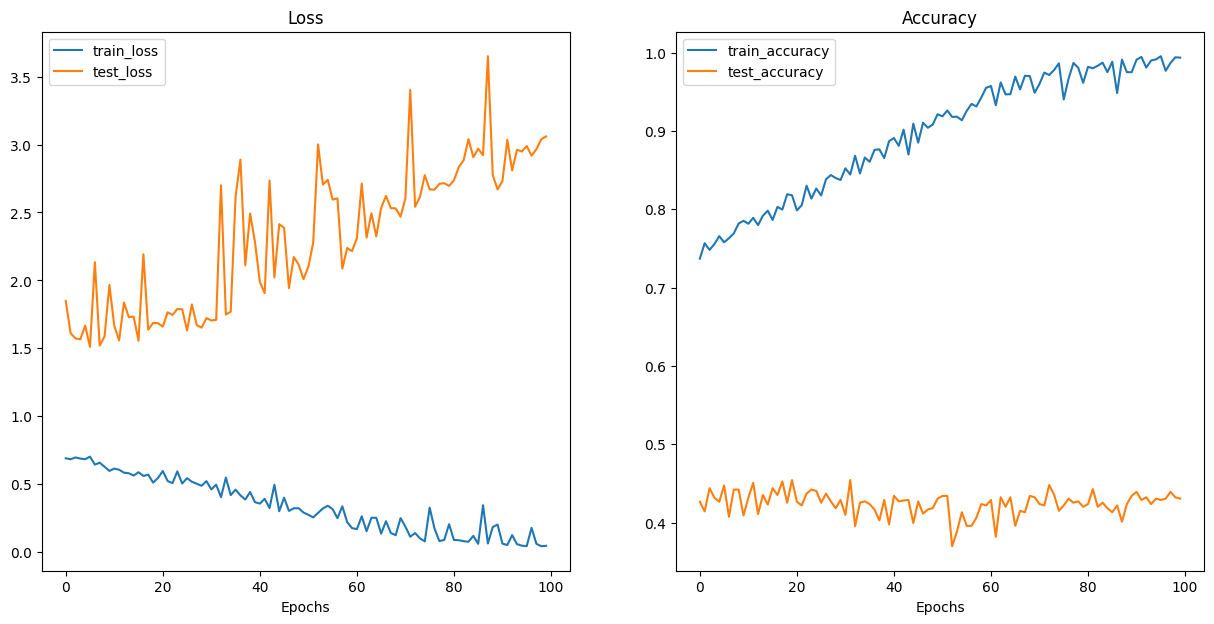

In [31]:
plot_loss_curves(model_0_results)